Laura Crielly 30 May 2024

# Example Dashboard
## 1. Curve with error band
This example illustrates how to draw an error band around a parametrized curve.

A parametrized curve x(t), y(t) can directly be drawn using plot.

[None]

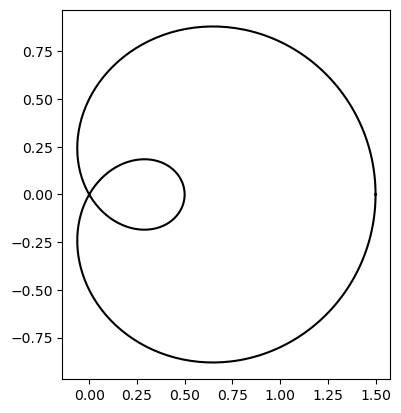

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import PathPatch
from matplotlib.path import Path

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.set(aspect=1)

## Creating annotated heatmaps
It is often desirable to show data which depends on two independent variables as a color coded image plot. This is often referred to as a heatmap. If the data is categorical, this would be called a categorical heatmap.

Matplotlib's imshow function makes production of such plots particularly easy.

The following examples show how to create a heatmap with annotations. We will start with an easy example and expand it to be usable as a universal function.

A simple categorical heatmap
We may start by defining some data. What we need is a 2D list or array which defines the data to color code. We then also need two lists or arrays of categories; of course the number of elements in those lists need to match the data along the respective axes. The heatmap itself is an imshow plot with the labels set to the categories we have. Note that it is important to set both, the tick locations (set_xticks) as well as the tick labels (set_xticklabels), otherwise they would become out of sync. The locations are just the ascending integer numbers, while the ticklabels are the labels to show. Finally, we can label the data itself by creating a Text within each cell showing the value of that cell.

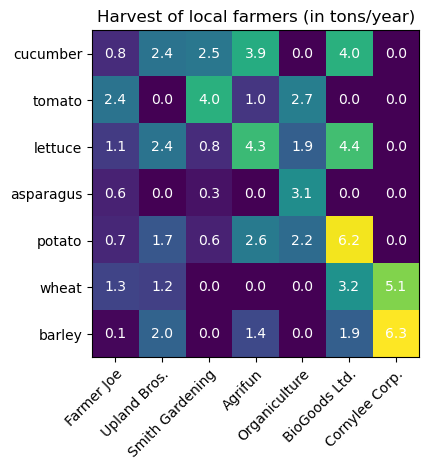

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl


vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

## Producing multiple histograms side by side
This example plots horizontal histograms of different samples along a categorical x-axis. Additionally, the histograms are plotted to be symmetrical about their x-position, thus making them very similar to violin plots.

To make this highly specialized plot, we can't use the standard hist method. Instead, we use barh to draw the horizontal bars directly. The vertical positions and lengths of the bars are computed via the np.histogram function. The histograms for all the samples are computed using the same range (min and max values) and number of bins, so that the bins for each sample are in the same vertical positions.

Selecting different bin counts and sizes can significantly affect the shape of a histogram. The Astropy docs have a great section on how to select these parameters: http://docs.astropy.org/en/stable/visualization/histogram.html

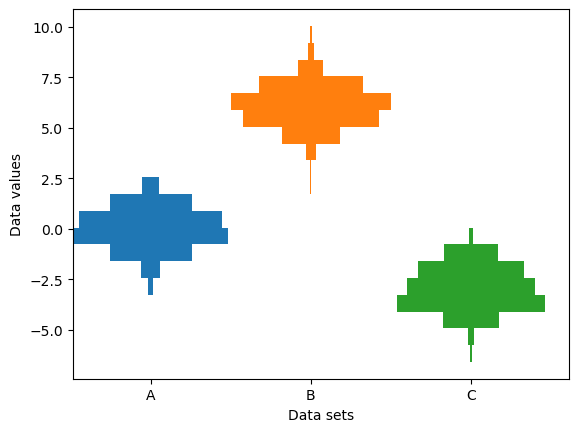

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
number_of_bins = 20

# An example of three data sets to compare
number_of_data_points = 387
labels = ["A", "B", "C"]
data_sets = [np.random.normal(0, 1, number_of_data_points),
             np.random.normal(6, 1, number_of_data_points),
             np.random.normal(-3, 1, number_of_data_points)]

# Computed quantities to aid plotting
hist_range = (np.min(data_sets), np.max(data_sets))
binned_data_sets = [
    np.histogram(d, range=hist_range, bins=number_of_bins)[0]
    for d in data_sets
]
binned_maximums = np.max(binned_data_sets, axis=1)
x_locations = np.arange(0, sum(binned_maximums), np.max(binned_maximums))

# The bin_edges are the same for all of the histograms
bin_edges = np.linspace(hist_range[0], hist_range[1], number_of_bins + 1)
heights = np.diff(bin_edges)
centers = bin_edges[:-1] + heights / 2

# Cycle through and plot each histogram
fig, ax = plt.subplots()
for x_loc, binned_data in zip(x_locations, binned_data_sets):
    lefts = x_loc - 0.5 * binned_data
    ax.barh(centers, binned_data, height=heights, left=lefts)

ax.set_xticks(x_locations, labels)

ax.set_ylabel("Data values")
ax.set_xlabel("Data sets")

plt.show()